In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head(10)


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [3]:
dataset.shape


(1156, 7)

In [6]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
dataset['PURPOSE'].fillna("NOT", inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_10868\245801013.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("NOT", inplace=True)


In [5]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], 
                                       errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], 
                                     errors='coerce')


In [6]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])


In [7]:
dataset.dropna(inplace=True)


In [8]:
dataset.drop_duplicates(inplace=True)


In [9]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values


{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

C:\Users\DELL\AppData\Local\Temp\ipykernel_10868\1346305968.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10868\1346305968.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)


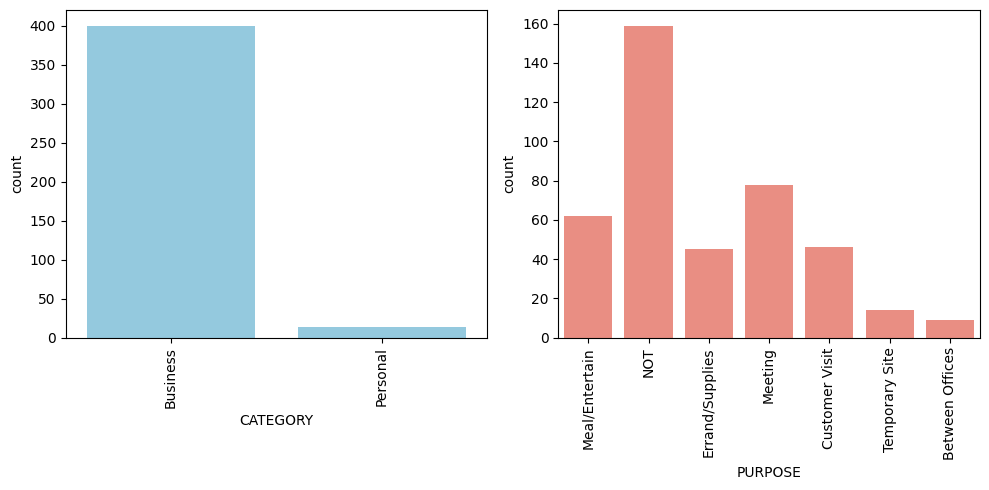

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_counts(dataset, features, figsize=(10, 5)):
    num_plots = len(features)
    fig, axes = plt.subplots(1, num_plots, figsize=figsize)

    colors = ["skyblue", "salmon"]  # Define a list of colors
    for i, feature in enumerate(features):
        sns.countplot(x=feature, data=dataset, ax=axes[i], color=colors[i % len(colors)]) 
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

    plt.tight_layout()
    plt.show()

# Example usage
plot_categorical_counts(dataset, ['CATEGORY', 'PURPOSE'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10868\3903834601.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='day-night', palette=colors)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10868\3903834601.py:8: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=dataset, x='day-night', palette=colors)


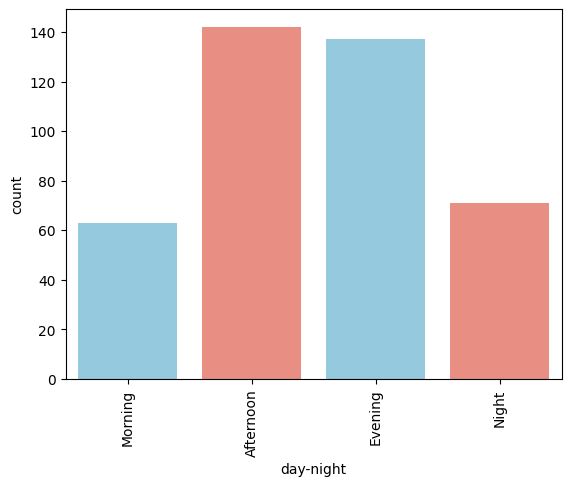

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette
colors = ["skyblue", "salmon"] 

# Create the countplot with the specified color palette
sns.countplot(data=dataset, x='day-night', palette=colors) 

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

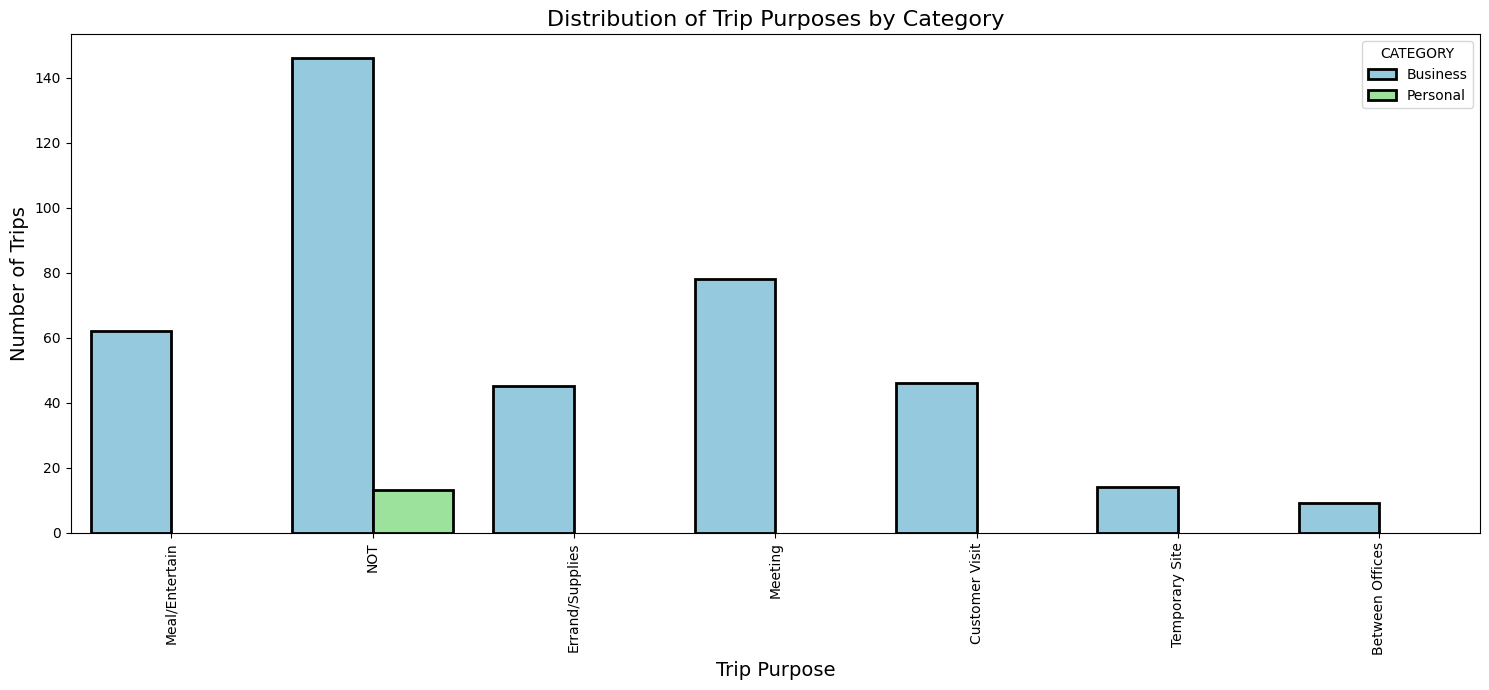

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette for categories
category_colors = {"Business": "skyblue", "Leisure": "salmon", "Personal": "lightgreen"}

# Create a larger figure for better visualization
plt.figure(figsize=(15, 7))

# Create a more informative and visually appealing countplot
sns.countplot(
    data=dataset,
    x="PURPOSE",
    hue="CATEGORY",
    palette=category_colors,  # Use the defined color palette for categories
    linewidth=2,  # Increase line width for bar borders
    edgecolor="black",  # Add black borders to bars
)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Add a title and informative labels
plt.title("Distribution of Trip Purposes by Category", fontsize=16)
plt.xlabel("Trip Purpose", fontsize=14)
plt.ylabel("Number of Trips", fontsize=14)

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()

<Axes: >

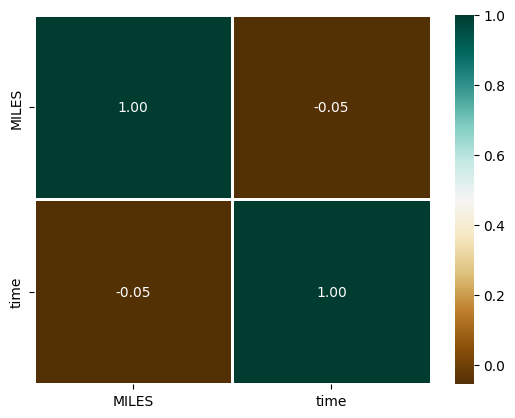

In [26]:
# Select only numerical columns for correlation calculation
numeric_dataset = dataset.select_dtypes(include=['number'])

sns.heatmap(numeric_dataset.corr(), 
            cmap='BrBG', 
            fmt='.2f', 
            linewidths=2, 
            annot=True)

# This code is modified by Susobhan Akhuli


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

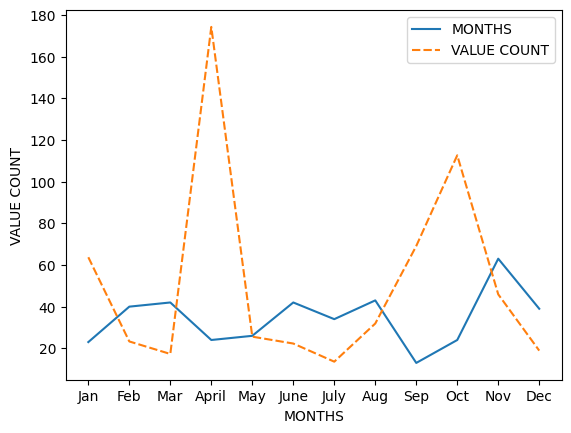

In [16]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": dataset.groupby('MONTH',
                                                  sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

In [39]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)


Text(0, 0.5, 'COUNT')

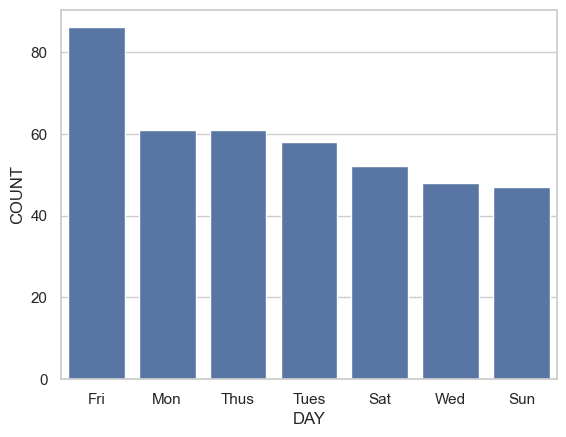

In [40]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')


<Axes: ylabel='MILES'>

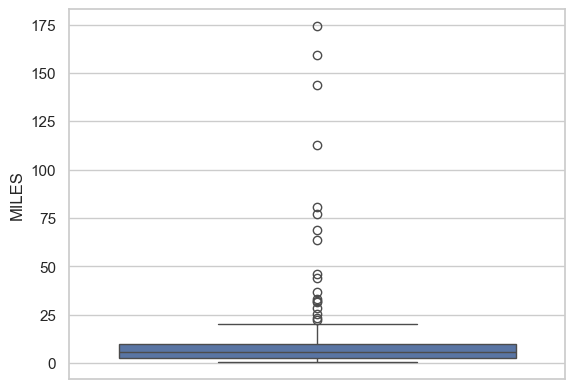

In [41]:
sns.boxplot(dataset['MILES'])


<Axes: ylabel='MILES'>

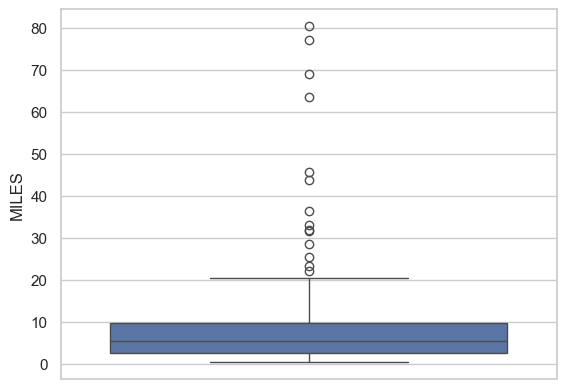

In [42]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_1696\615779499.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

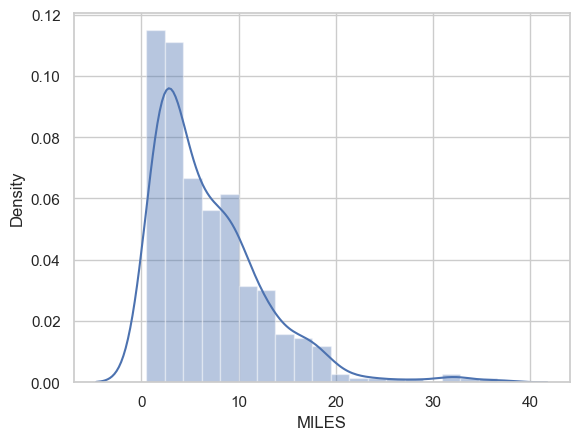

In [43]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])
